In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:
sc.settings.figdir = "sfig7"



In [3]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')


In [4]:
adata_i=adata_lesional[adata_lesional.obs["Patient_status2"]=="Neurofibroma"]
 

In [5]:
counts = adata_i.obs["test13"].value_counts()
categories_to_keep = counts[counts >= 10].index
adata_i = adata_i[adata_i.obs["test13"].isin(categories_to_keep)].copy()


In [6]:
kirstin = {"Fibroblast general": ["PDGFRA", "LUM", "DCN"],
           'F2/3: Bridge': ['CXCL12', 'APOE', 'EFEMP1', #'GGT5', 
                                    "APOC1", "C7", "PLA2G2A",   'PPARG', 
                                          #'IL1RL1', 'MARCH3', 'PCSK1', 
                                          
                                          
                                          # "FMO1", 
                                          
                                   # "PPARG", "TNFSF14"
                           "MYOC", "GDF10", # "LINC-PINT", 
                             # "POU3F3", 
                                  # "TNNT3", 
                    ],
                      "F5+: RAMP1": ["RAMP1", "RELN", 'PLEKHA6',  "IGFBP2", 'SFRP1', #"COL26A1", #"TAC1"
                                   ], #"CPE", "PTN", "IGF1", 

 'F5: NGFR+': [  'EBF2', "NGFR",  'SFRP4',# "TENM2", #"TM4SF1", "ANGPTL7",  
               "ITGA6", "CDH19",  "CLDN1", #"FOXS1", #"SOX17",
                 #"CAVIN2", "SFRP5", #"TNNC1"
                
                     ],
           "F5 Unique": [ 'PLEKHA6','EBF2', 'TENM2','PEAR1',  #'APOD', 'CYP1B1',
                      ],
           
          
         #  'endoneurial NAF': ['SOX9', 'OSR2', 'P4HB', 'CSPG4', 'CD34', "PDGFRB"],
        #   'perineurial NAF': ['SLC2A1', 'ITGA6',],
         
        #   "Pericyte": ["RGS5"]
          }
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(8,8))

sc.pl.dotplot(
    adata_i,
    kirstin, cmap="Reds",
    groupby="test13",vmax=1,colorbar_title='Mean expression\n(variance scaled)',
    standard_scale="var", 
    dendrogram=False,
    save="fig4_neurofibroma.pdf"
)   

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

In [7]:
F23_NAME="F2/3: Perivascular"

In [8]:
adata_i.obs['test13'].unique()

['F5: NGFR+', 'F5: RAMP1+', 'F2/3: Perivascular']
Categories (3, object): ['F2/3: Perivascular' < 'F5: RAMP1+' < 'F5: NGFR+']

/tmp/ipykernel_1040/3256932049.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


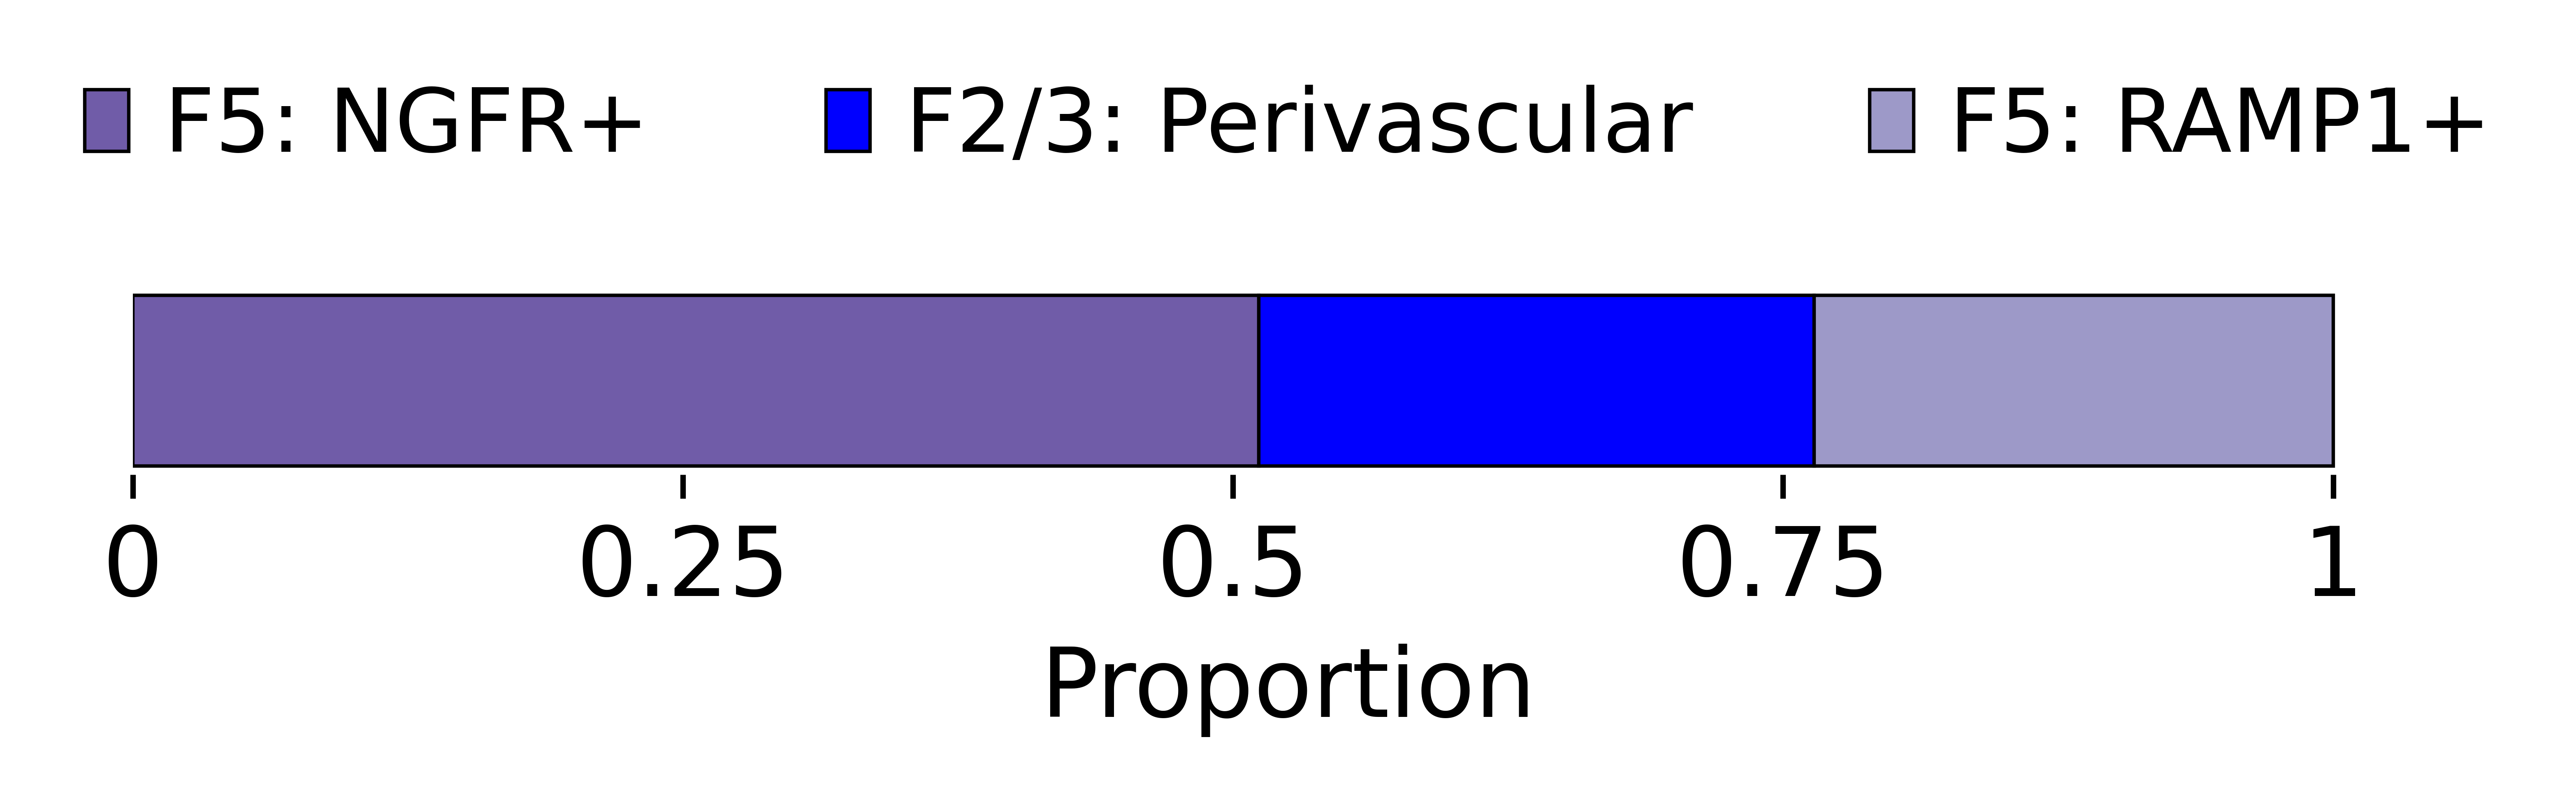

In [9]:
# custom_colors ={'F2: Universal': [0.81411765, 0.88392157, 0.94980392, 1.        ],
#                 F1_NAME: [1.        , 0.97244137, 0.75680123, 1.        ],
#                   'F1: Regenerative': [1.        , 0.97244137, 0.75680123, 1.        ],
#                 'F3: FRC-like': [0.99692426, 0.89619377, 0.84890427, 1.        ],
#                 'F4': [0.50196078, 0.79058824, 0.50143791, 1.        ],
#                 F23_NAME: [0.47294118, 0.71163399, 0.85071895, 1.        ],
#                 'F5: Schwann-like': [0.56608997, 0.55218762, 0.75933872, 1.        ]

#                }
custom_colors = {
    'F3: FRC-like': "#FF1493",#  '#FF0000', 
    F23_NAME: '#0000FF',
        F23_NAME: '#0000FF',

    #'F2 Universal/F1': '#4d4d4d',

    'F5: Schwann-like': "#7850b2", #'#800080',
    'VE/Pericyte':"#FFC0CB",# "#8B0000", "#FFC1C1", #'#696969', #'#A9A9A9',  "#FF0000", 
    'F2: Universal': '#ADD8E6',
    #'F2 Universal/F1': '#0000FF',
    
    "F1: Superficial": '#FFFF00',    'F1: Regenerative': '#FFFF00',

    'Schwann': '#000000',
    
    # Updated F4 colors
    'F4: DS_DPEP1+': '#008000',         # Dark green
    #'F4: Mixed': '#',      # Mid green (standard green)
    'F4: TNN+COCH+': '#80ff80',     # Very light green
    'F5: RAMP1+': "#9D99C8",
    "F5: NGFR+": "#705ca8" , # ORANGE VERSION "#FF6700",
    'Other': '#DCDCDC', #'lightgrey'
    
    'Immune cell': "#D2B48C",
    "Sweat gland duct":  '#A9A9A9',
     'Sweat gland': "#777777"# '#008080',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channelinner': '#5FCFC8',
# # 'Sweat gland channel outer': 'Sweat gland channel outer',
#  'Sweat gland channel_outer':
}


#adata_eczema_fbs = adata_eczema[adata_eczema.obs["celltypes_Fig2"].str.startswith("F")]
proportions = adata_i.obs['test13'].value_counts(normalize=True)

proportions_filtered = proportions[proportions.index != 'Nonspecific']


fig, ax = plt.subplots(figsize=(6, 0.5))



previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')  # Default color for 'Other'
    ax.barh([1], [proportion], left=previous_proportion, color=color, label=label,
            linewidth=0.5,   
         edgecolor='black',  )
    previous_proportion += proportion

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower center', bbox_to_anchor=(0.5, 1.2),
          ncol=len(unique_labels), frameon=False)

ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('Proportion')
ax.grid(False)
plt.tight_layout()
plt.show()
  

/tmp/ipykernel_1040/1102449897.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


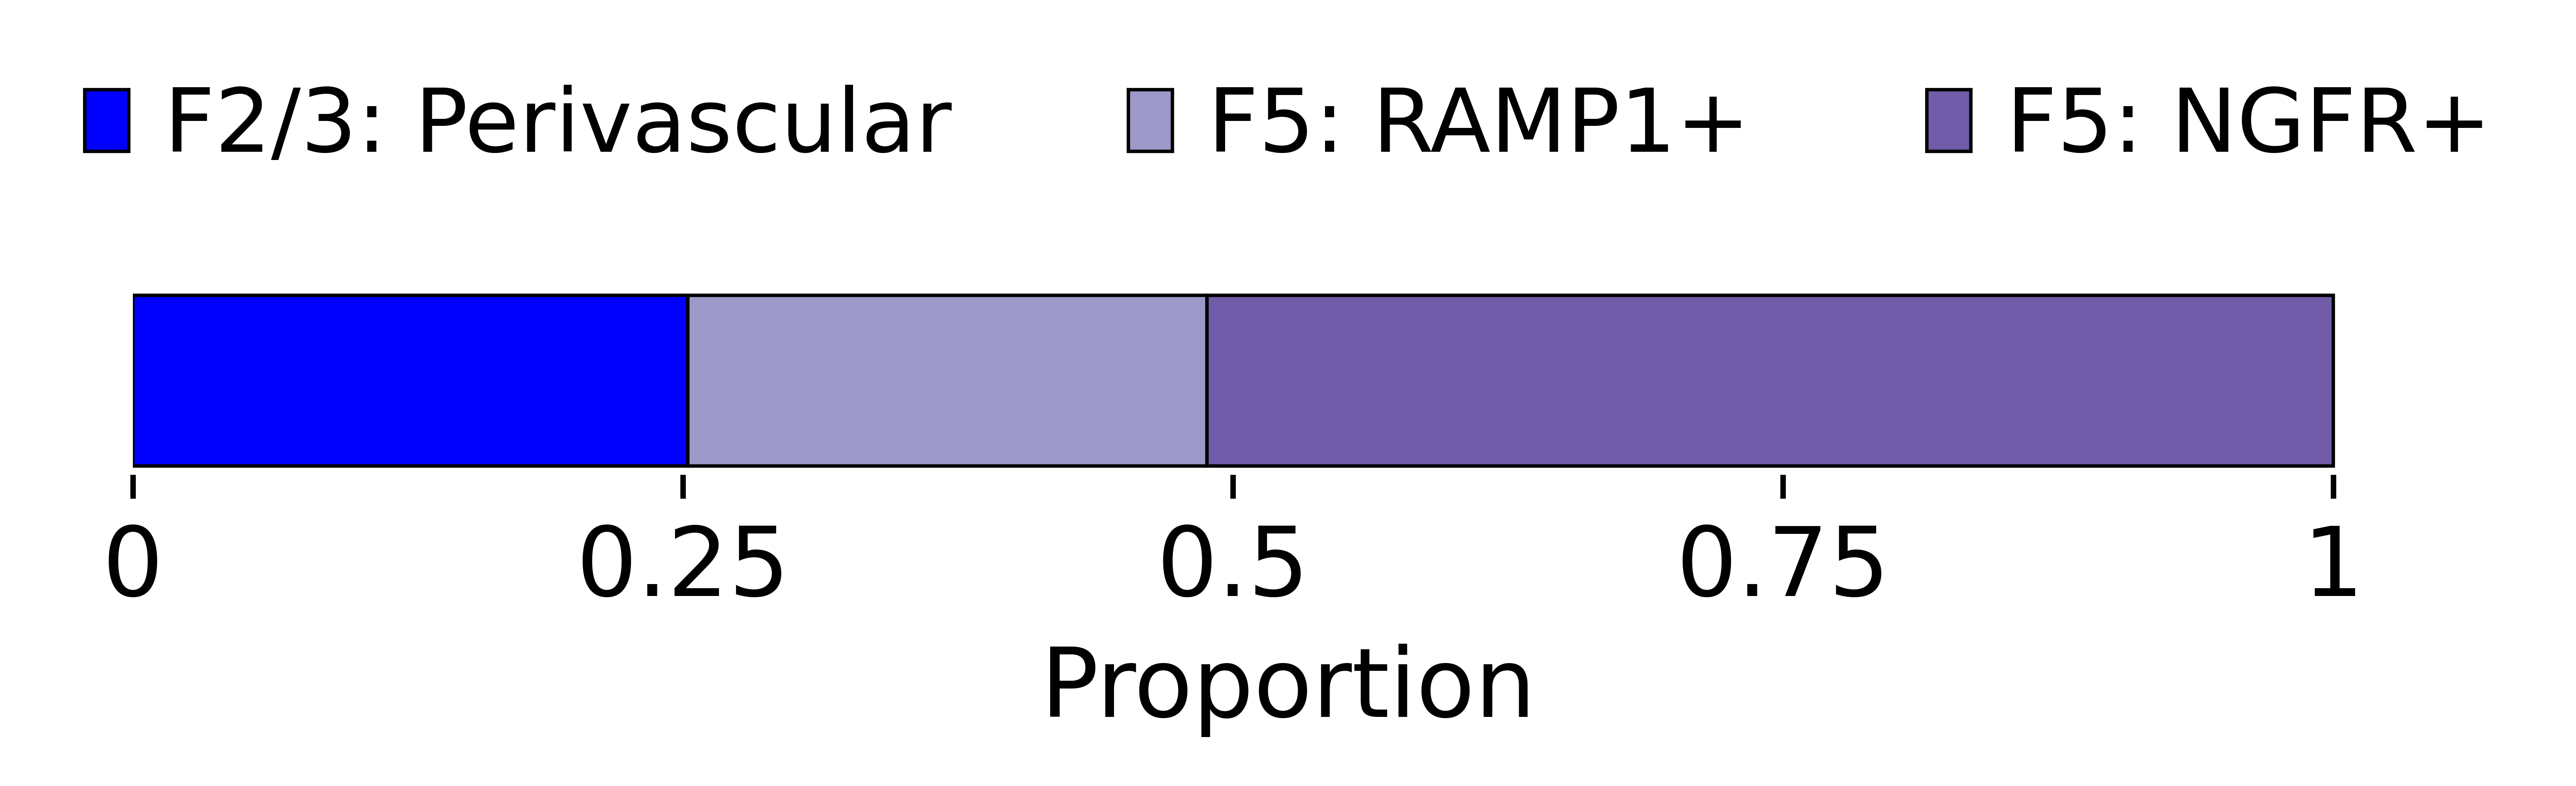

In [10]:
# Define the desired order
desired_order = [F23_NAME, 'F5: RAMP1+', 'F5: NGFR+']

# Reorder the proportions_filtered Series based on desired_order
proportions_filtered = proportions_filtered.reindex(desired_order).dropna()

fig, ax = plt.subplots(figsize=(6, 0.5))

previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')  # Default color for 'Other'
    ax.barh([1], [proportion], left=previous_proportion, color=color, label=label,
            linewidth=0.5, edgecolor='black')
    previous_proportion += proportion

# Adjust legend order based on desired_order
handles, labels = ax.get_legend_handles_labels()
ordered_handles = [handles[labels.index(l)] for l in desired_order if l in labels]

ax.legend(ordered_handles, desired_order, loc='lower center', bbox_to_anchor=(0.5, 1.2),
          ncol=len(ordered_handles), frameon=False)

ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('Proportion')
ax.grid(False)
plt.tight_layout()
plt.show()

# cxcl13 figure

In [11]:
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(4,4))
import scanpy as sc
adata_core=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.new')
adata_core=adata_core[adata_core.obs["Patient_status"]=="Healthy"]
adata_core.shape

(100837, 36601)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

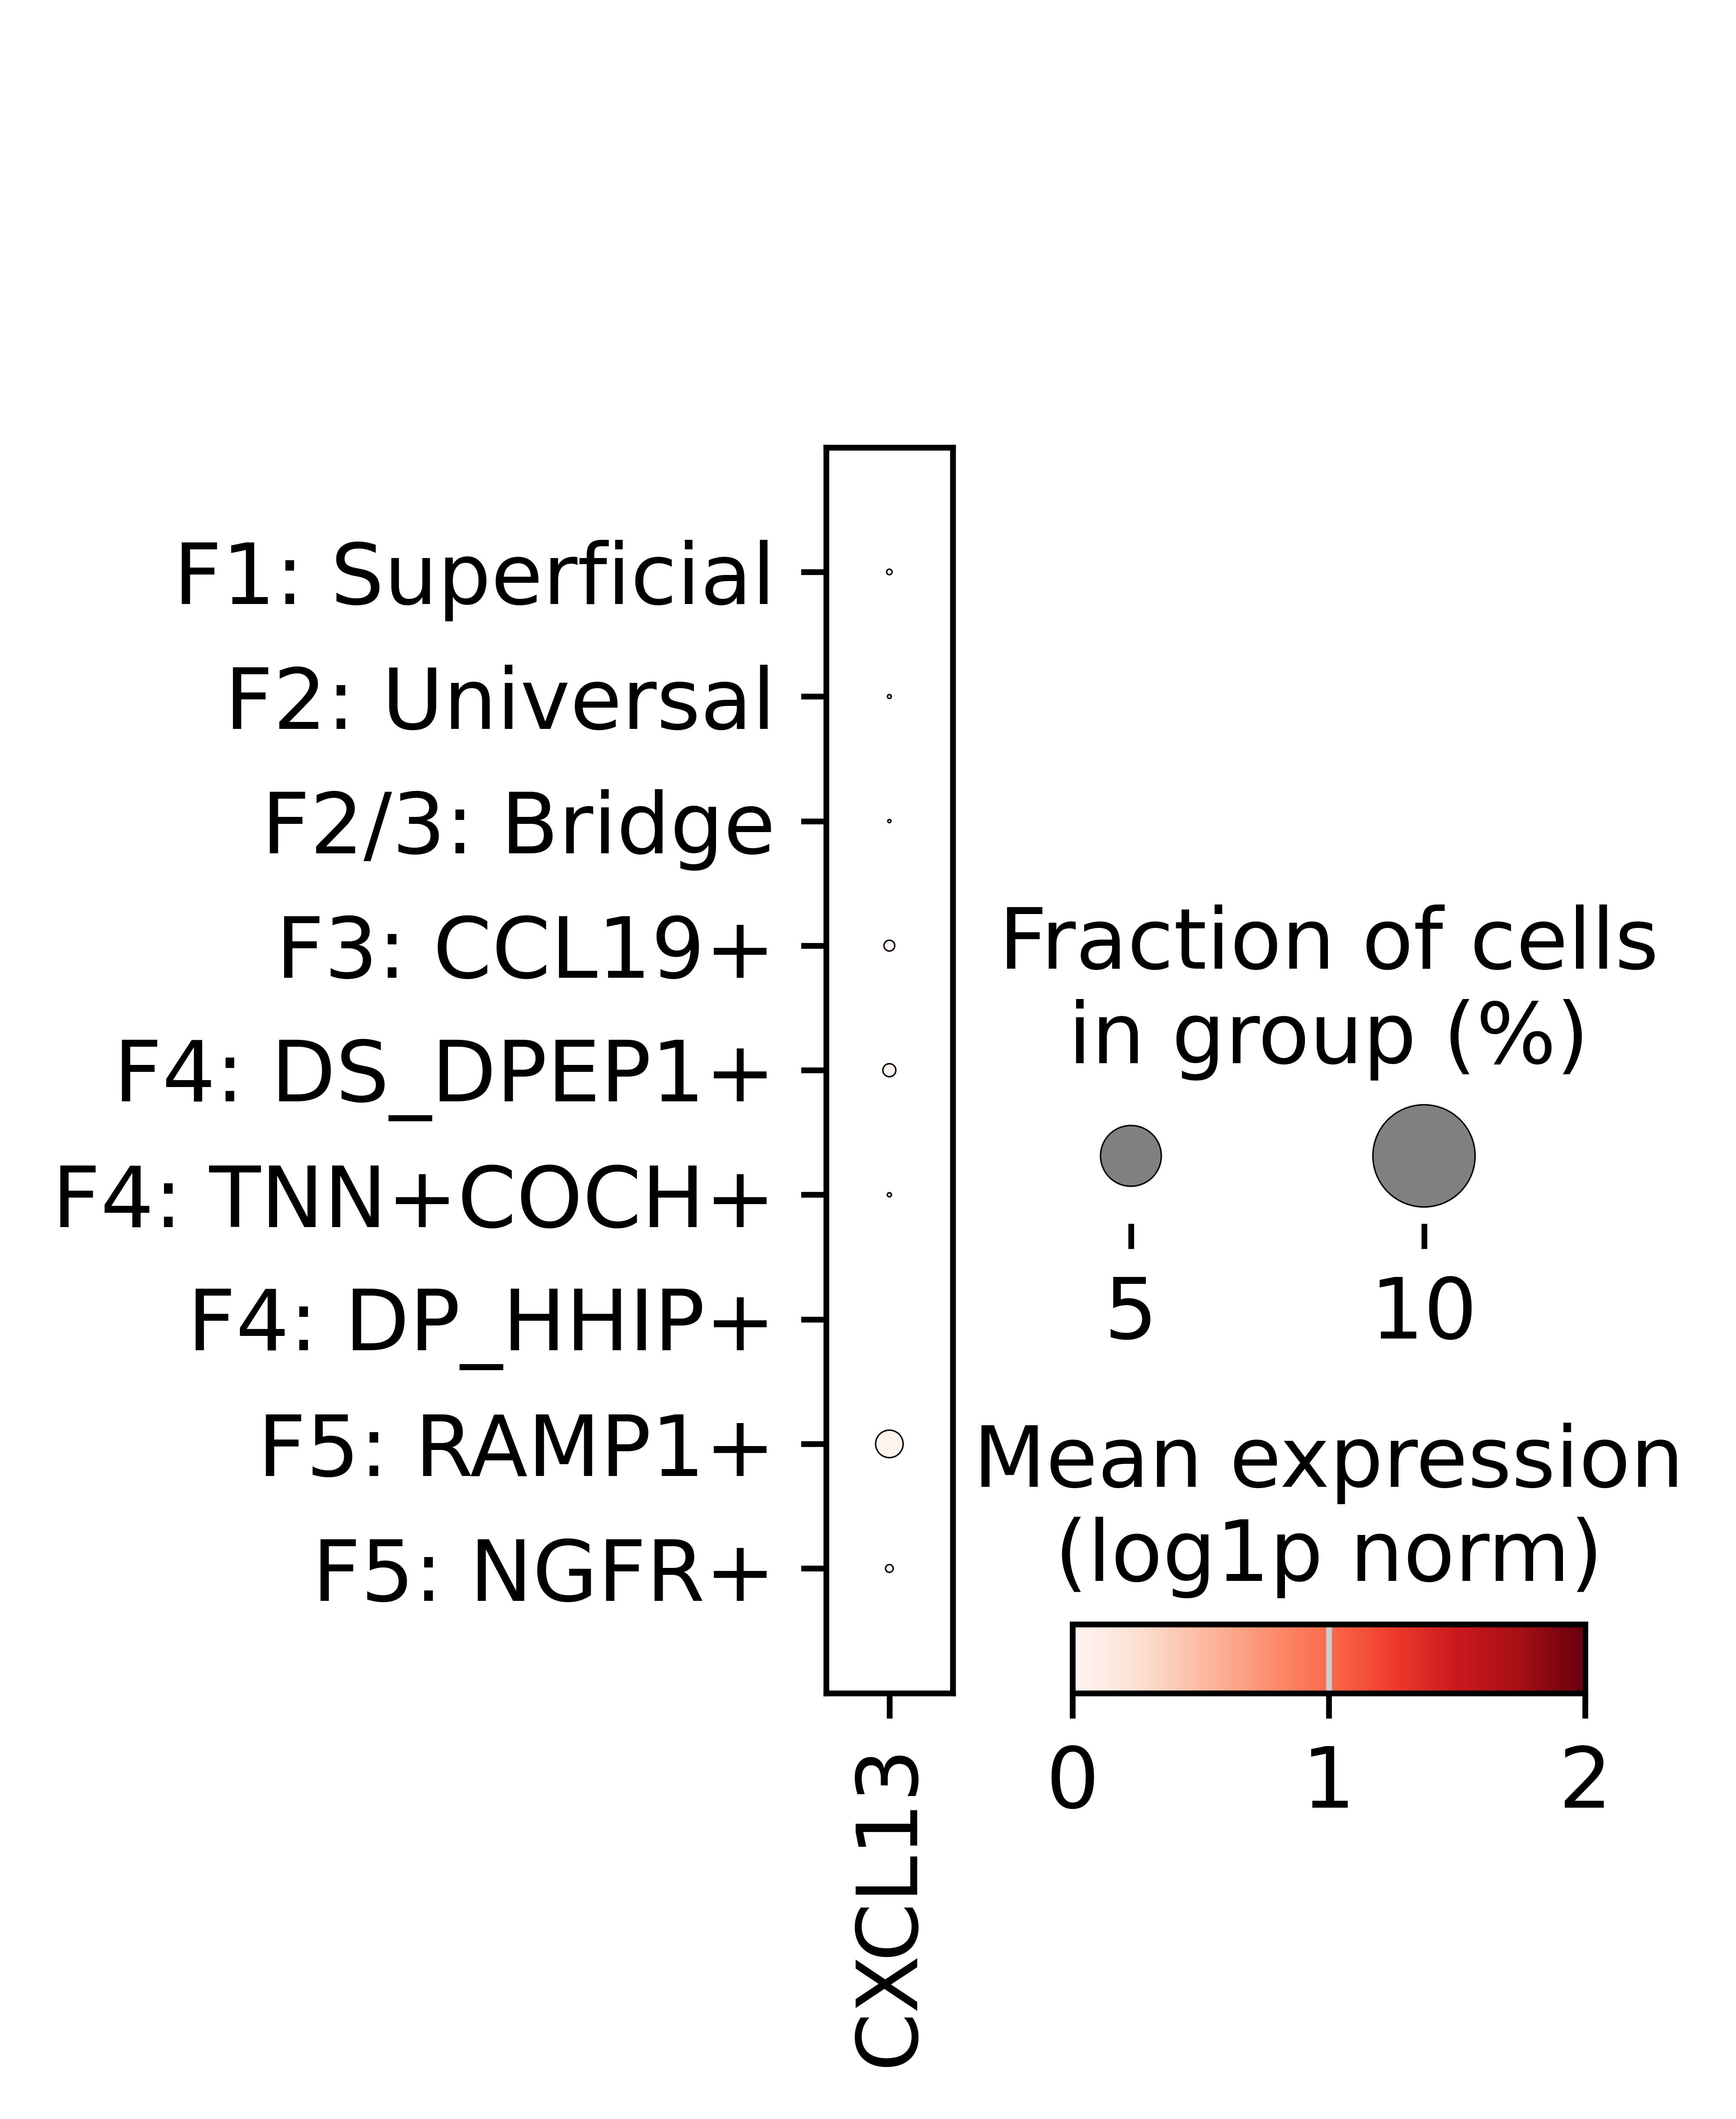

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

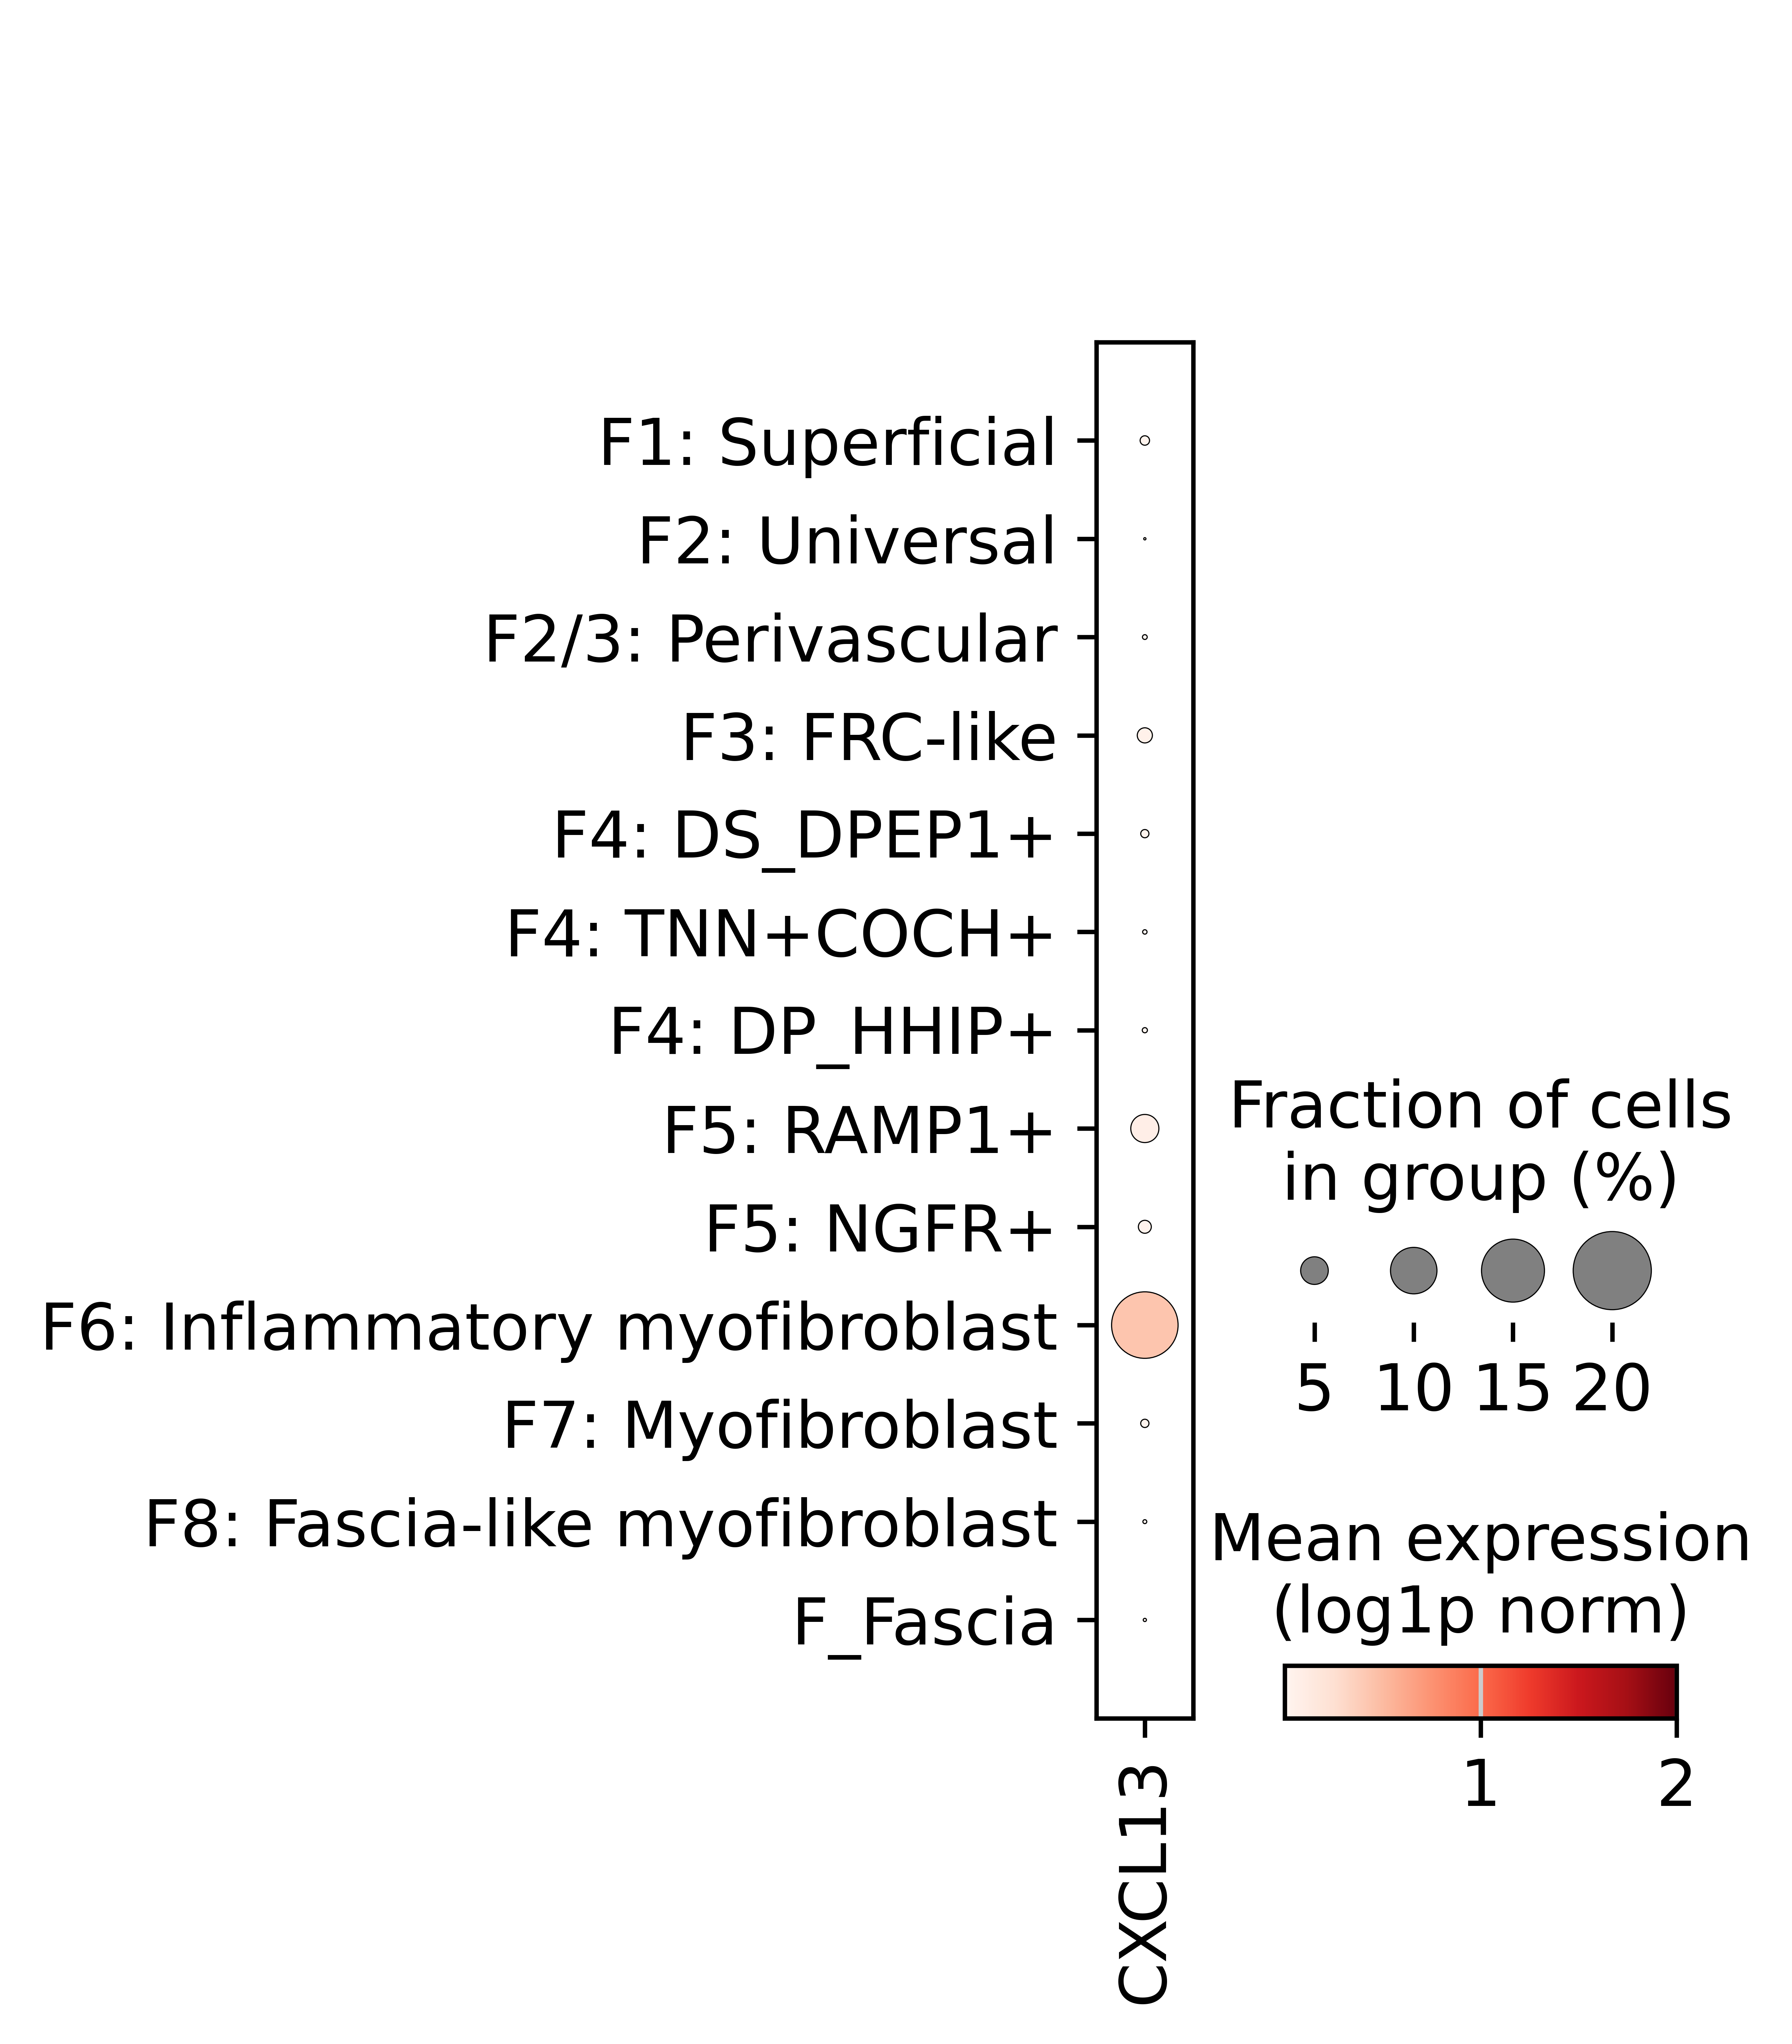

In [12]:
sc.pl.dotplot(
    adata_core,
    "CXCL13", cmap="Reds",
    groupby="corefb_names2",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    #save="fig4_cxcl13.png"
)   

sc.pl.dotplot(
    adata_lesional,
    "CXCL13", cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    #save="fig4_cxcl13.png"
)   

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

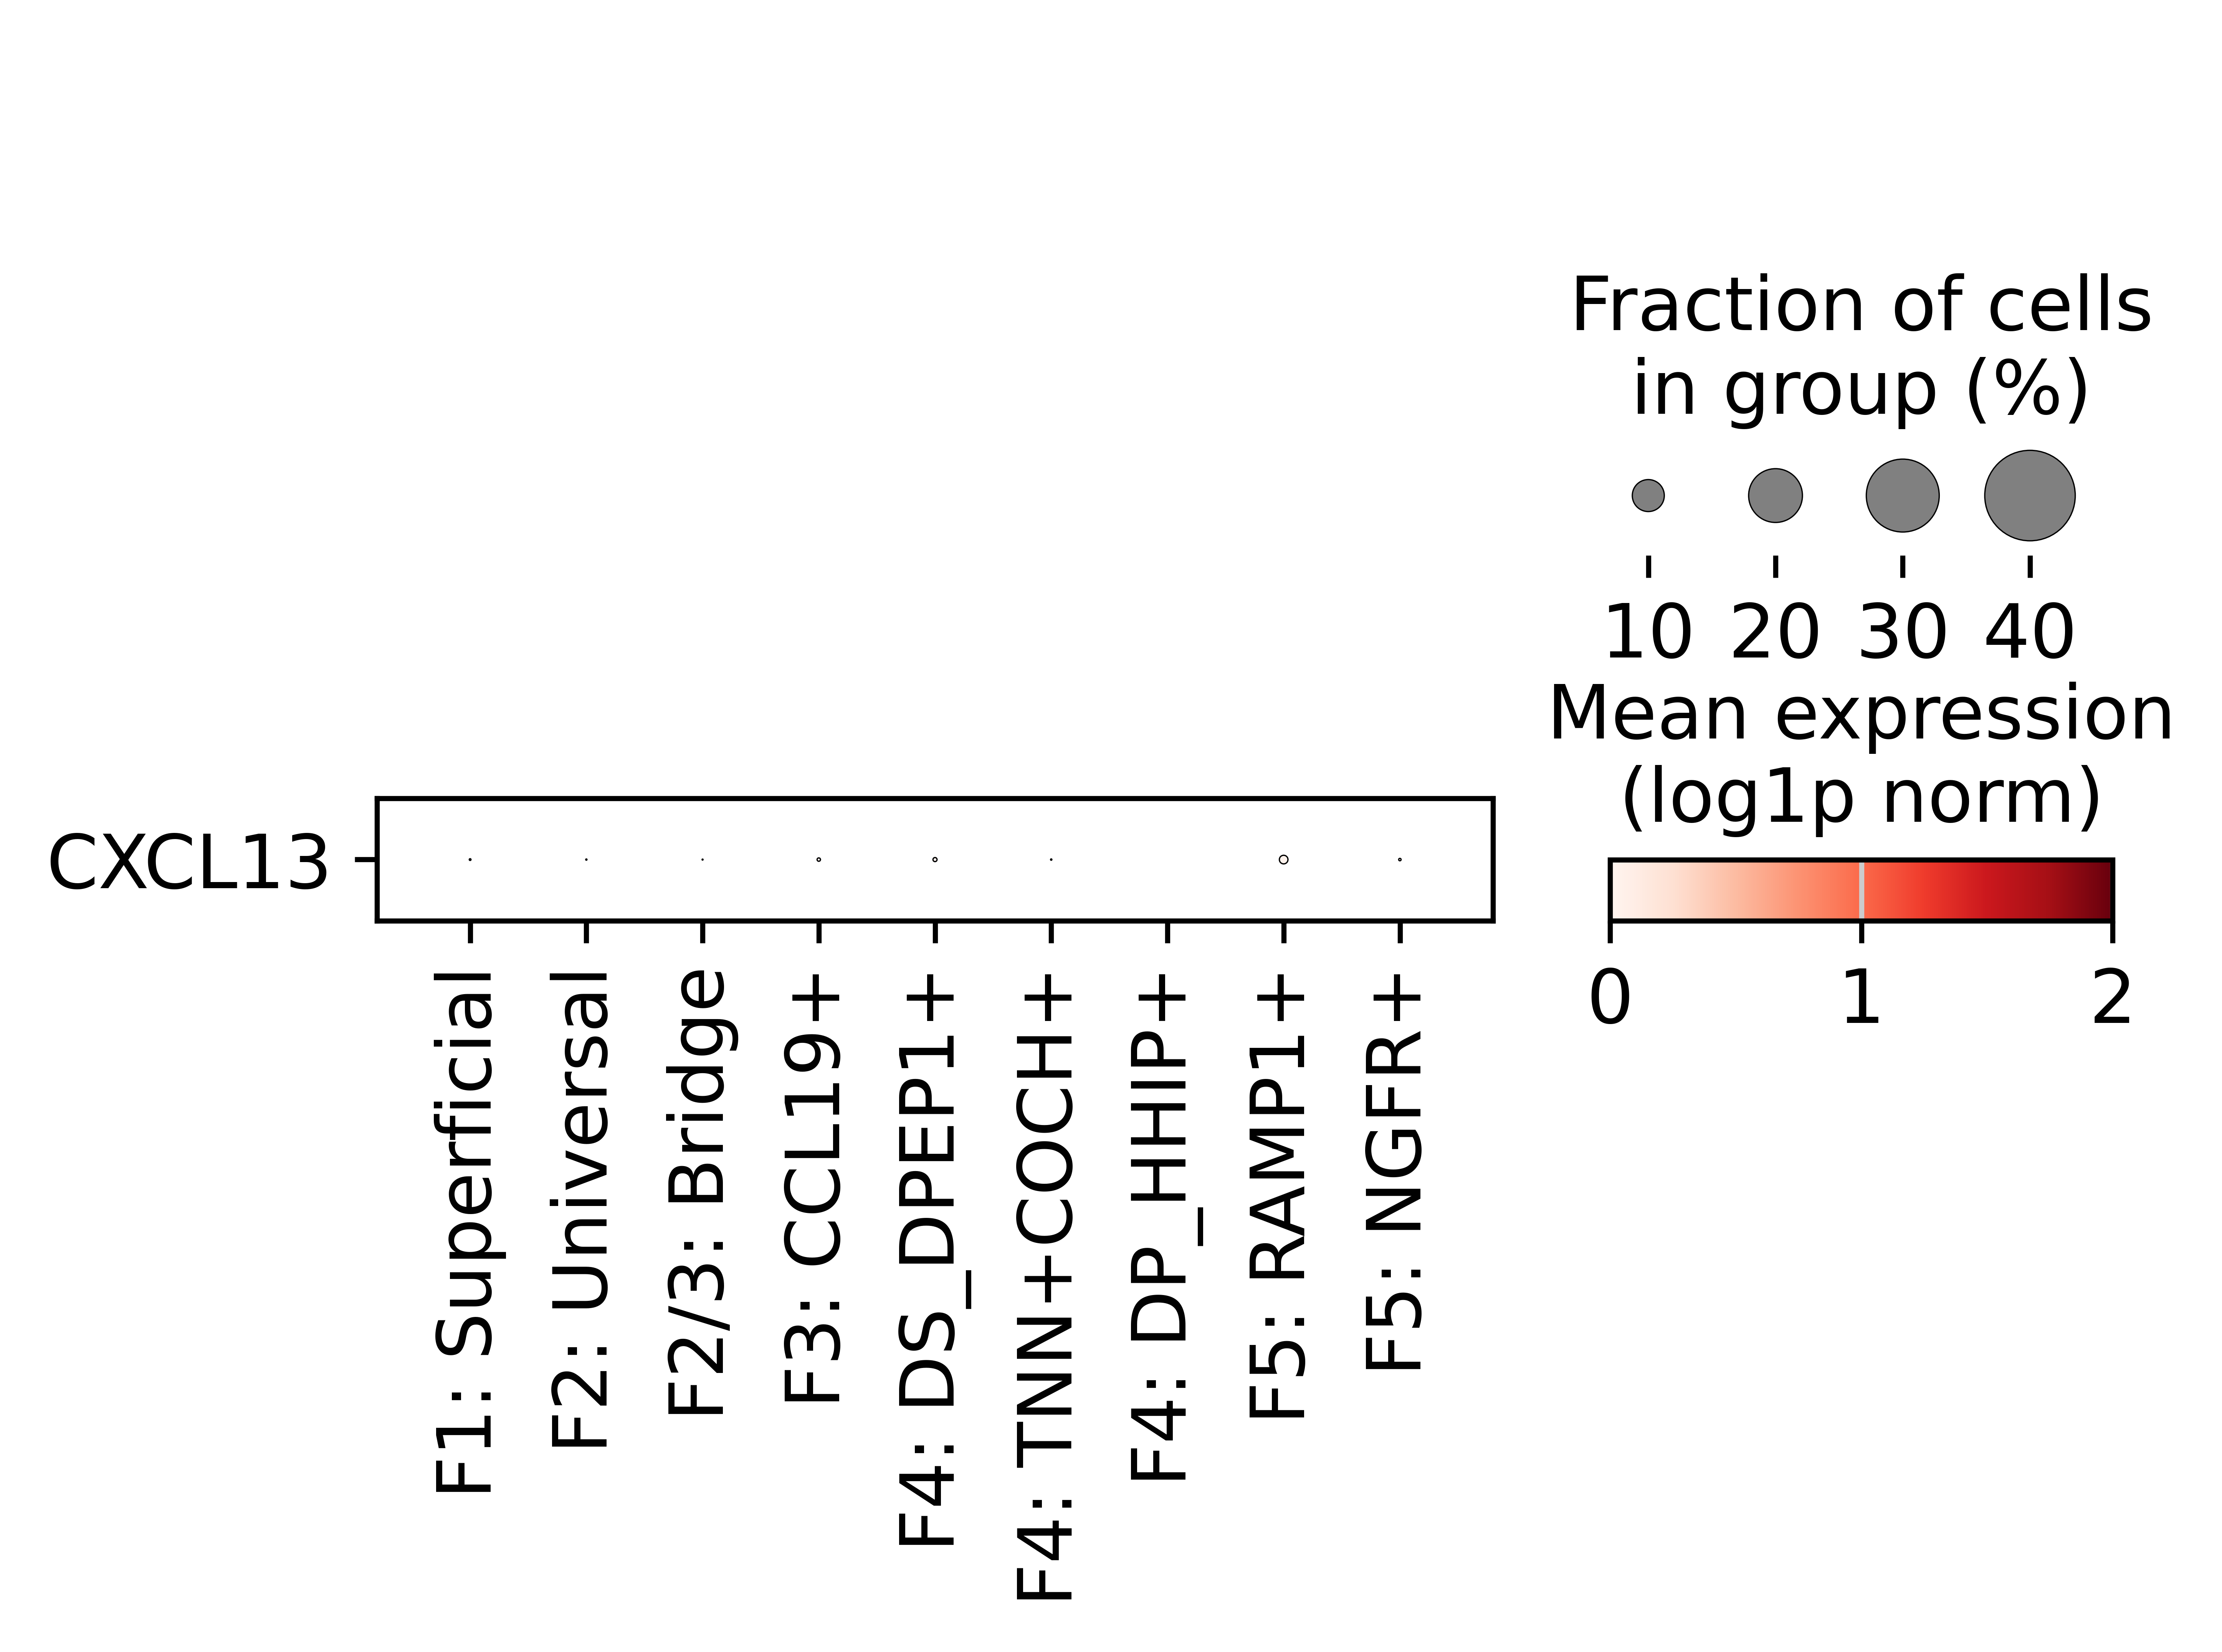

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

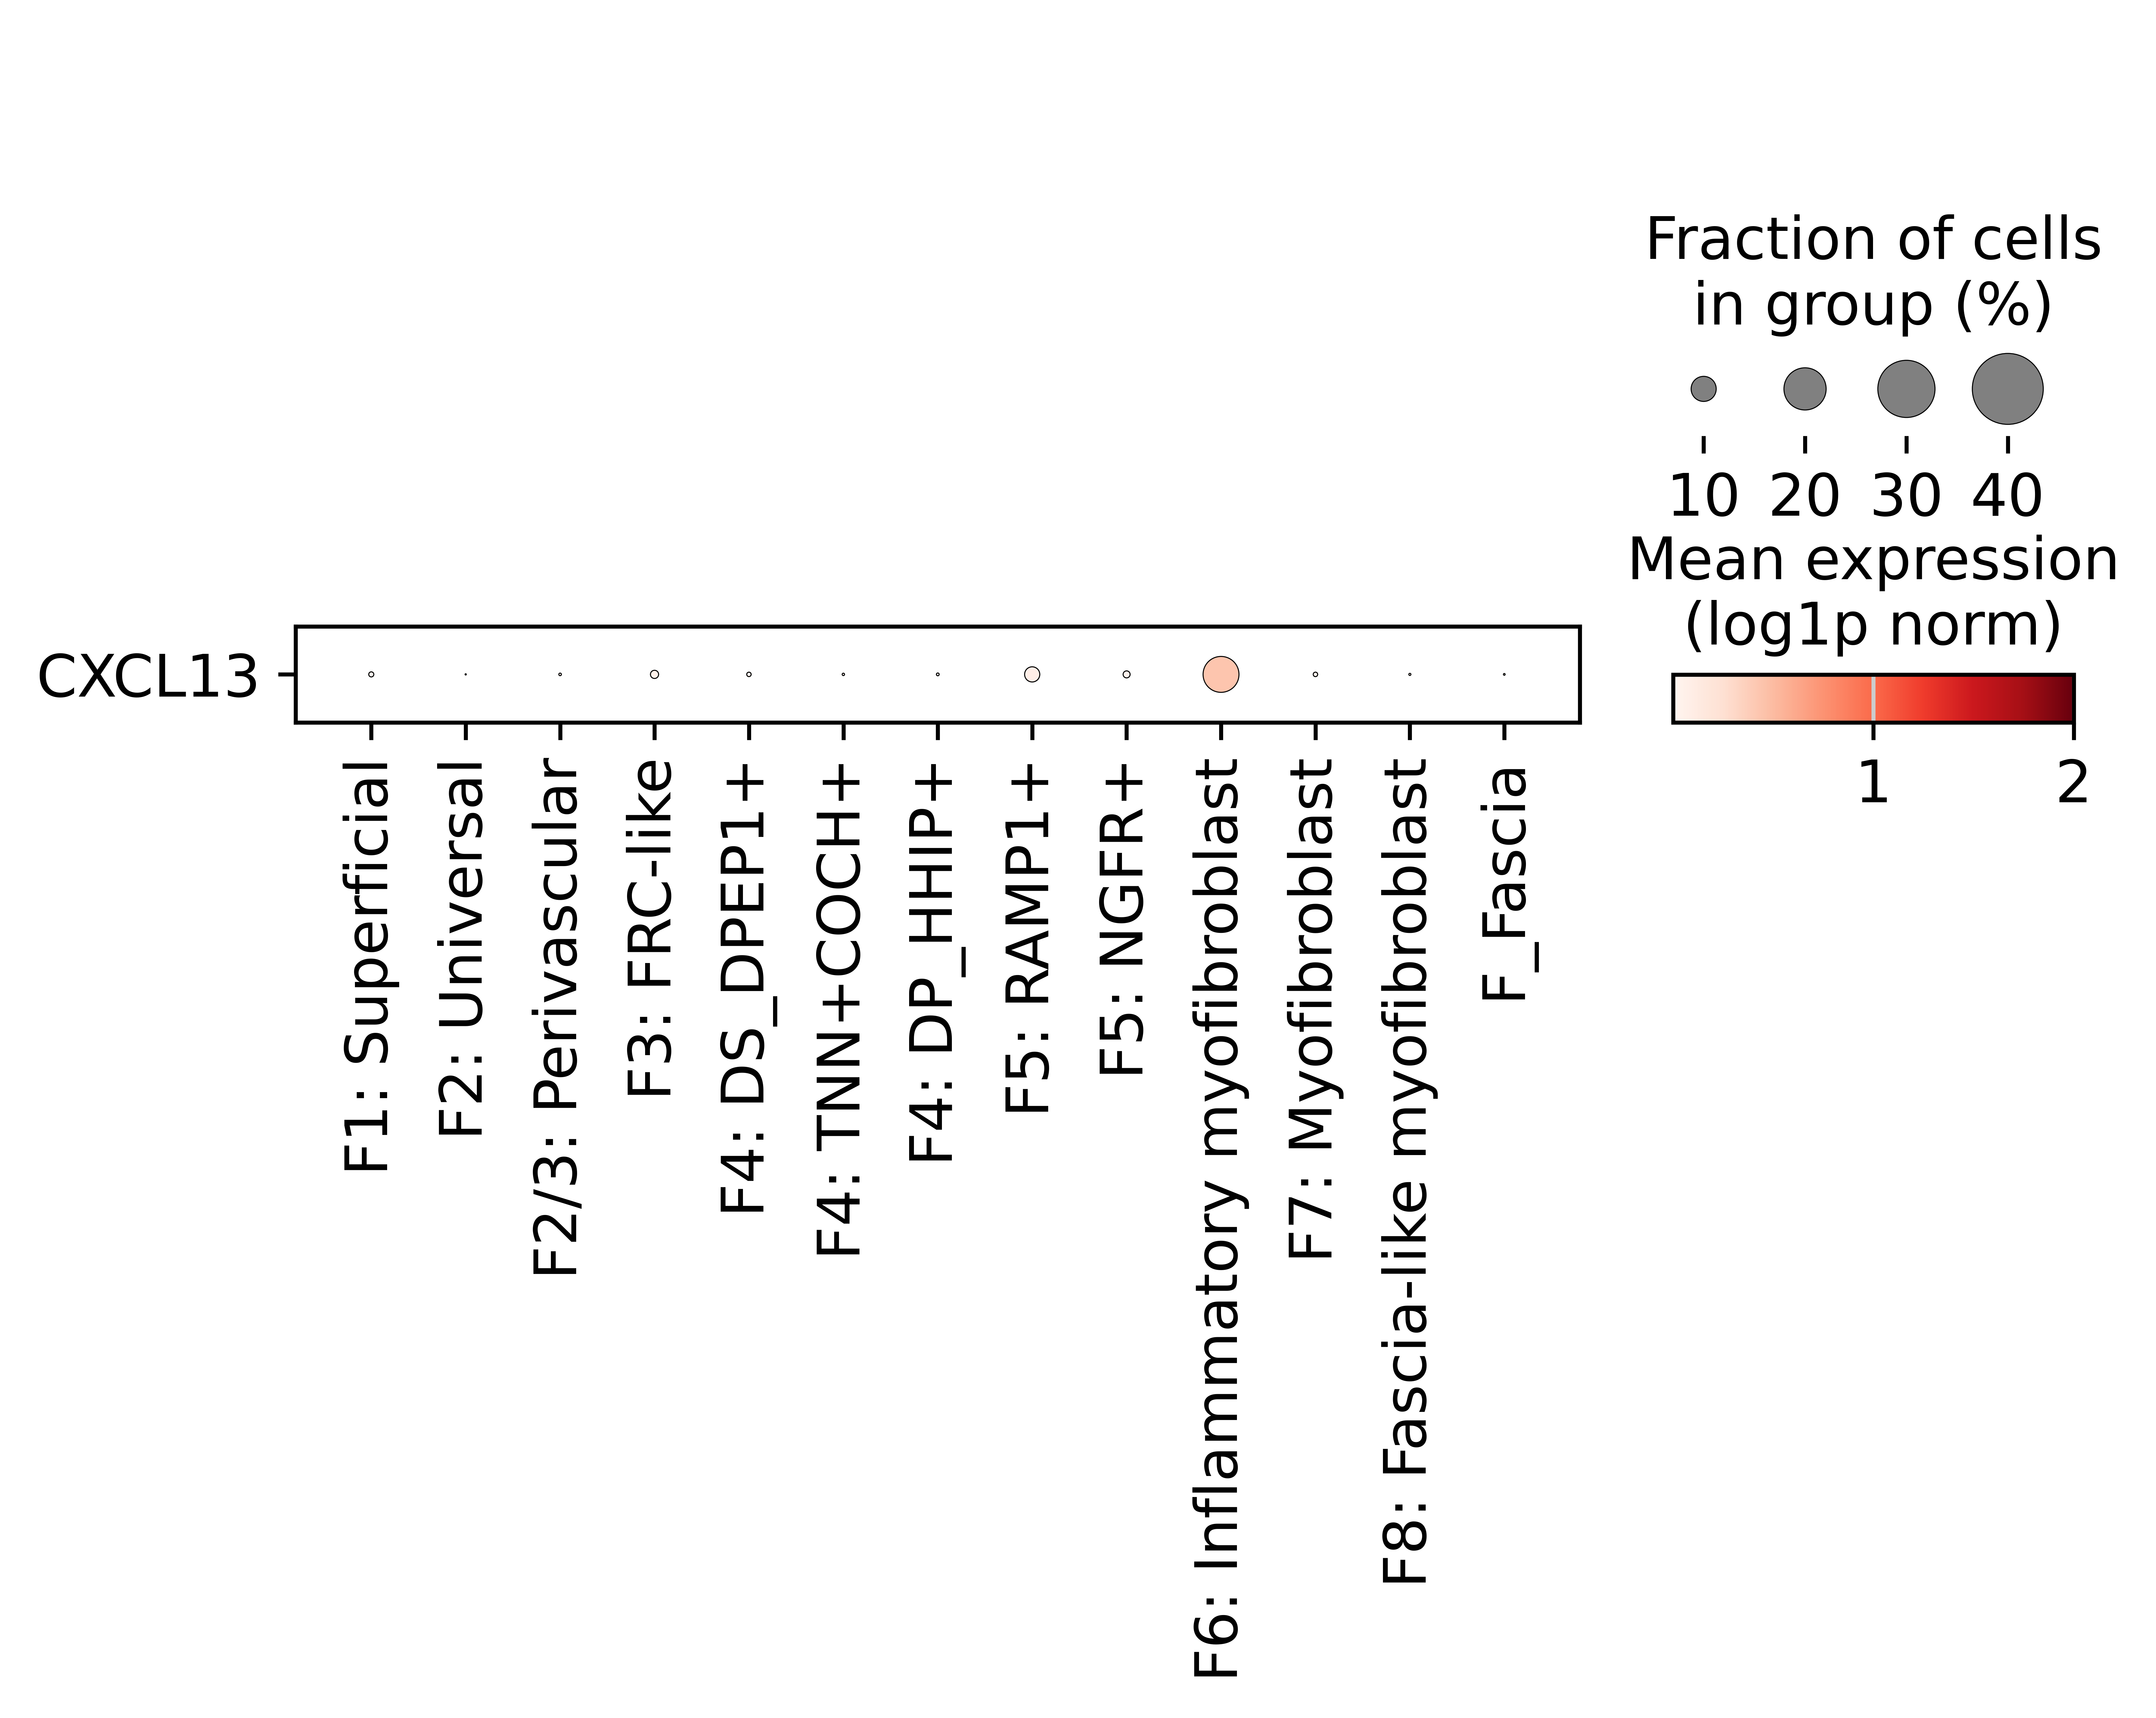

In [13]:
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(4,4))

sc.pl.dotplot(
    adata_core,
    "CXCL13", cmap="Reds",
    groupby="corefb_names2",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
            swap_axes=True,
    save="fig4_cxcl13_healthy.pdf",
        dot_max=0.4,
)   


sc.pl.dotplot(
    adata_lesional,
    "CXCL13", cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="fig4_cxcl13.pdf",
        swap_axes=True,
    dot_max=0.4,

)   